# Introduction

<img align="right" style="padding-right:10px;" src="figures_wk4/guinea_pig.png" width=300><br>

 This week's assignment will give me some practice defining and testing a hypothesis.
 
 ***

**Our Dataset: **
**Dataset Name::** ToothGrowth.csv (locted in the assign_wk4 folder)<br>
The tooth growth dataset describes the length of the odontoblasts (teeth) in each of 10 guinea pigs at three Vitamin C dosage levels (0.5, 1, and 2 mg) with two delivery methods (orange juice or ascorbic acid).

The file contains 60 observations of 3 variables <br>
len : Tooth length <br>
supp : Supplement type (VC or OJ)<br>
dose : Dose in milligrams<br>

***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('assign_wk4/ToothGrowth.csv', index_col=0)

# Methods/Code

## 1. Graphically describe the dataset
    - This could include box plots, histograms, etc.
    - Provide a summary of your initial findings about the dataset.

I want to know what the data looks like.

In [3]:
df.head()

,len,supp,dose
1,4.2,VC,0.5
2,11.5,VC,0.5
3,7.3,VC,0.5
4,5.8,VC,0.5
5,6.4,VC,0.5


In [4]:
df.tail()

,len,supp,dose
56,30.9,OJ,2.0
57,26.4,OJ,2.0
58,27.3,OJ,2.0
59,29.4,OJ,2.0
60,23.0,OJ,2.0


In [5]:
df.agg({'len': ['count','mean','median','std','min','max']}).round(2)

,len
count,60.00
mean,18.81
median,19.25
std,7.65
min,4.20
max,33.90


In [6]:
df.groupby(['supp']).agg({'len': ['count','mean','median','std','min','max']}).round(2)

len                               
     count   mean median   std  min   max
supp                                     
OJ      30  20.66   22.7  6.61  8.2  30.9
VC      30  16.96   16.5  8.27  4.2  33.9

In [7]:
df.groupby(['dose']).agg({'len': ['count','mean','median','std','min','max']}).round(2)

len                                
     count   mean median   std   min   max
dose                                      
0.5     20  10.60   9.85  4.50   4.2  21.5
1.0     20  19.74  19.25  4.42  13.6  27.3
2.0     20  26.10  25.95  3.77  18.5  33.9

From the descriptive data it appears the Vitamin C from the asorbic acid had the greatest range of tooth length in the guinea pigs. A guinea pig given the  lowest dose of VC has teeth 4.2 units long and the guinea pig with the highest dose of VC has a tooth length of 33.9 units. Guinea pigs given the highest dose of either supplement had the greatest tooth lengths, and those with the smallest lengths recieved the lowest dose.

<AxesSubplot:xlabel='dose', ylabel='len'>

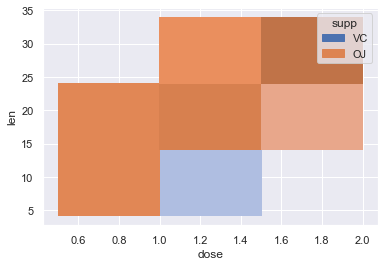

In [8]:
sns.histplot(data=df, x='dose',y='len',hue='supp', bins=3)

<AxesSubplot:xlabel='len', ylabel='Probability'>

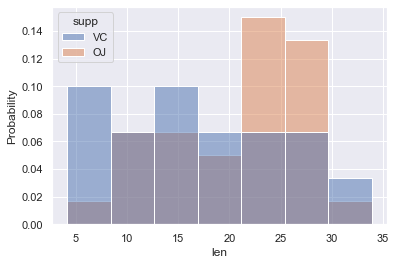

In [9]:
sns.histplot(data=df,x='len',hue='supp', stat='probability')

More guniea pigs who receive vitamin c from orange juice have teeth with lengths of 20-30 units long than those that received ascorbic acid. Subjects that only took doses of ascorbic acid had equal probability to have teeth of lengths 10-15 and 20-30.

<AxesSubplot:xlabel='len', ylabel='Probability'>

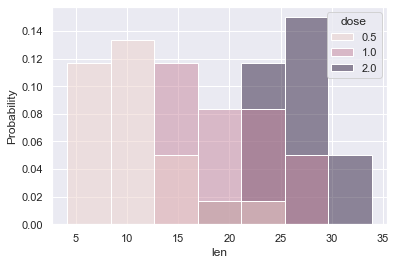

In [10]:
sns.histplot(data=df,x='len',hue='dose', stat='probability')

Subjects with 0.5 mg doses did not have teeth longer than 25 units long. Those with doses of 1.0 only had lengths between 13 and 30, no more and no less. Guniea pigs with doses of 2.0 had lengths between 17 and 35, no more and no less. Only those with a dose of 0.5 had has probability of landing between 5-13 and those with doses of 2.0 have has probability of having teeth greater than 30 units long.

<AxesSubplot:xlabel='len'>

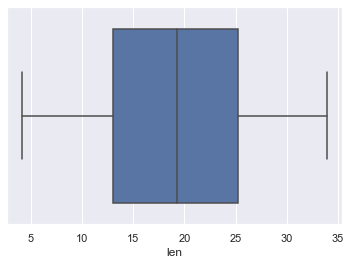

In [11]:
sns.boxplot(data=df, x='len')

This boxplot appears to have a relatively normal distribution of lengths in teeth.

<AxesSubplot:xlabel='dose', ylabel='len'>

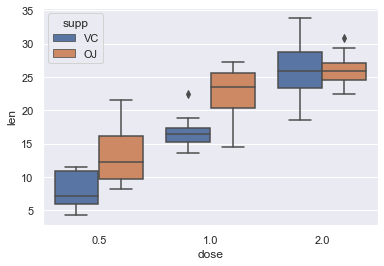

In [12]:
sns.boxplot(data=df, x='dose', y='len', hue='supp')

This data is a little more interesting. So the distributions of the guniea pigs who received the same doses were different given the type of supplement administered. 

- **Dose 0.5, Supp VC:** The majority of lengths landed in the 50-75th percentile range and above the median.
- **Dose 0.5, Supp OJ:** The majority of lengths landed in the 75-100th percentile range, above the median, and overall had greater values than the same dose of VC.
- **Dose 1.0, Supp VC:** The lengths have a much shorter range than the rest of the trials from about 13 units to about 18 units and outliers between 20 and 25 units long.
- **Dose 1.0, Supp OJ:** The majority of lengths occur from 0-25th percentile and under the median. The outliers of VC occured under the median of the same dose of OJ.
- **Dose 2.0, Supp VC:** This is a fairly normal distribution and it is hard to see where the majority lies on either side of the median. This range is greater than all other trials, from around 18 units to almost 35 units long.
- **Dose 2.0, Supp OC:** This range lies almost exactly within the 25-75th percentile of the same dose of VC, from around 23-29, and has outliers past 30 units long.

<AxesSubplot:xlabel='dose', ylabel='len'>

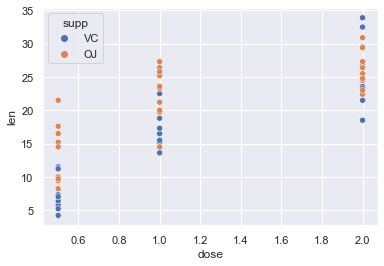

In [13]:
sns.scatterplot(data=df,x='dose',y='len',hue='supp')

## 2. Check of data normality, using both methods
    - Graphically  check for normality
    - Statistical test for normality

In [14]:
from numpy import mean
from numpy import std
data = df['len']
data_VC = df[df['supp'] == 'VC']
data_OJ = df[df['supp'] == 'OJ']
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))
print('VC_mean=%.3f VC_stdv=%.3f' % (mean(data_VC['len']), std(data_VC['len'])))
print('OJ_mean=%.3f OJ_stdv=%.3f' % (mean(data_OJ['len']), std(data_OJ['len'])))

mean=18.813 stdv=7.585
VC_mean=16.963 VC_stdv=8.127
OJ_mean=20.663 OJ_stdv=6.495


Normal Distribution calculated from formula with random variable (1):

$$f(len) = \frac{1}{\left(7.585\right)\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{1-18.83}{7.585}\right)^{2}}= 0.003$$

$$f(lenVC) = \frac{1}{\left(8.127\right)\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{1-16.963}{8.127}\right)^{2}}= 0.007$$

$$f(lenOJ) = \frac{1}{\left(6.495\right)\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{1-20.663}{6.495}\right)^{2}}= 0.0006$$

***

The distribution is very close to normal given the Normal Distribution calculation produces a value close to zero.

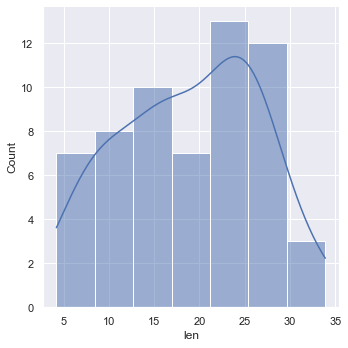

In [15]:
sns.displot(data,kde=True)

Seems there are two peaks of the bell curve, highest one is to the left, lower one is to the right. This represents the full dataset.

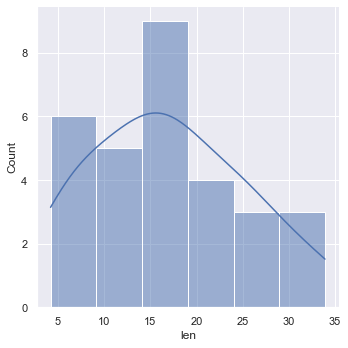

In [16]:
sns.displot(data_VC['len'],kde=True)

The data set with only VC seems to be a better bell-shape than the full dataset but is still not perfectly normally distributed.

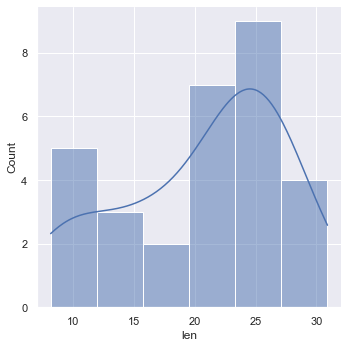

In [17]:
sns.displot(data_OJ['len'],kde=True)

This dataset with only OJ trails is a lit

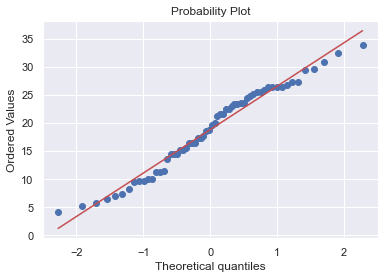

In [18]:
import scipy.stats as stats
res = stats.probplot(data, plot=plt)

There are quite a few deviations above and below the mean. showing me that it really is not Normally Distributed. What will the statistical tests show me?

In [19]:
from scipy.stats import shapiro

# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05 #I want to be 95% confident that my analysis its correct CI=0.95
if p > alpha:
    print('Sample looks normally distributed (fail to reject H0)')
else:
    print('Sample does not look normally distributed (reject H0)')

Statistics=0.967, p=0.109
Sample looks normally distributed (fail to reject H0)


Taken from this week's FTE. The p-value is greater than the alpha so the confidence interval includes the H0, or "it is not significant."

In [20]:
from scipy.stats import normaltest

# normality test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05 #I want to be 95% confident that my analysis its correct CI=0.95
if p > alpha:
    print('Sample looks normally distributed (fail to reject H0)')
else:
    print('Sample does not look normally distributed (reject H0)')
    
print(data.skew())
print(data.kurt())

Statistics=6.490, p=0.039
Sample does not look normally distributed (reject H0)
-0.14995189829252065
-0.9549824842435792


Interestingly, using the D'Agostino's K^2 Test produced a p-value lower than the alpha which resulted in rejecting the null hypothesis.

Skewness was -0.15 meaning it was partially skewed to the right with the longer tail being on the right of the mean.
Kurtosis was -0.95 meaning 95% of the total outcomes landed in the tail on the right list of the mean.

This makes more sense with our graphical representations of the distrbution above and more accurately represents the normality of the distribution, where it does not look normally distributed.

## 3. Defined a null and alternative hypothesis (Ho and Ha) for the dataset
    - Be specific and clear in your definitions

**H<sub>0</sub>:**  If a guinea pig is given a 2.0mg dose of vitamin C then the length of their teeth will be greater than the mean.

if dose = 2.0mg then len > mean-len

**H<sub>A</sub>:** If a guinea pig is given a 2.0mg dose of vitamin C then the length of their teeth will be less than the mean.

if dose = 2.0mg then len < mean-len

***

**H<sub>0</sub>:**  If a guinea pig is given a 0.5mg or 1mg dose of vitamin C then the length of their teeth will be less than the mean.

if dose < 2.0mg then len < mean-len

**H<sub>A</sub>:**  If a guinea pig is given a 0.5mg or 1mg dose of vitamin C then the length of their teeth will be greater than the mean.

if dose < 2.0mg then len > mean-len

***

In [21]:
df.mean()

len     18.813333
dose     1.166667
dtype: float64

In [22]:
d=2.0
dfnull = df[df['dose'] ==d]
dfnull2 = df[df['dose'] <d]
dfnull.head()

,len,supp,dose
21,23.6,VC,2.0
22,18.5,VC,2.0
23,33.9,VC,2.0
24,25.5,VC,2.0
25,26.4,VC,2.0


In [23]:
dfnull.head()

,len,supp,dose
21,23.6,VC,2.0
22,18.5,VC,2.0
23,33.9,VC,2.0
24,25.5,VC,2.0
25,26.4,VC,2.0


## Results/Output

## 4. Hypothesis testing 
    - Explain why you chose the test(s) you are using
    - Summarize your findings from the test(s) you performed

I will be using the one sampled t-test to observe the sample mean of the population with 2.0mg doses of Vitamin C to test if the sample mean is greater than the population mean. Would this be one-sampled or dependent sampled? I would think it was only a one-sampled because we are not testing against doses below 2mg yet.

#### One Sample T-Test 1)

In [24]:
from scipy.stats import ttest_1samp


dfnull_mean = np.mean(dfnull['len'])
print(f'Mean: {dfnull_mean}')

#t-test, where we are defining the Ho = 18.813
tset, pval = ttest_1samp(dfnull['len'], 18.813, alternative='less')
print(f'p-value: {pval}')

# eval p-value
if pval < 0.01:    # alpha value is 0.01 or 1% which means CV is 99%
   print('Reject null hypothesis')
else:
  print('Accept null hypothesis')

Mean: 26.099999999999994
p-value: 0.999999973520445
Accept null hypothesis


#### One Sample T-Test 2)

In [25]:
dfnull2_mean = np.mean(dfnull2['len'])
print(f'Mean: {dfnull2_mean}')

#t-test, where we are defining the Ho = 18.813
tset, pval = ttest_1samp(dfnull2['len'], 18.813, alternative='greater')
print(f'p-value: {pval}')

# eval p-value
if pval < 0.01:    # alpha value is 0.01 or 1% which means CV is 99%
   print('Reject null hypothesis')
else:
  print('Accept null hypothesis')

Mean: 15.169999999999998
p-value: 0.9995691965299406
Accept null hypothesis


I will try to use the dependent or paired t-test to compare these two samples.

In [26]:
d=2.0
df['2mg'] = df['dose'] == d
df['<2mg'] = df['dose'] < d
df['2mg'] = df[df['dose'] == d]
df['<2mg'] = df[df['dose'] < d]
df['2mg'].fillna(df['2mg'].mean(), inplace=True)
df['<2mg'].fillna(df['2mg'].mean(), inplace=True)
df.head()

,len,supp,dose,2mg,<2mg
1,4.2,VC,0.5,26.1,4.2
2,11.5,VC,0.5,26.1,11.5
3,7.3,VC,0.5,26.1,7.3
4,5.8,VC,0.5,26.1,5.8
5,6.4,VC,0.5,26.1,6.4


In [27]:
#paired t-test
ttest,pval = stats.ttest_rel(df['2mg'], df['<2mg'], nan_policy='omit')
print(f'p-value: {pval}')

# eval p-value
if pval < 0.05:    # alpha value is 0.05 or 5%
   print('Reject null hypothesis')
else:
  print('Accept null hypothesis')

p-value: 6.17388312567309e-10
Reject null hypothesis


## Analysis of Results

## 5. Conclusion based on your analysis
    - Be sure to defend your conclusion. Include supporting information for your analysis.

**One Sample T-Test 1:**

The p-value (.99) is significantly greater than the alpha which suggests the null hypothesis must be accepted. Guinea pigs with vitamin C doses of 2mg had an average tooth length of 26 in our t-test, which is significantly greater than 18.813(the population mean). This outcome is tested at a 99% confidence interval, meaning we are 99 percent confident that the average tooth length in the sample of 2mg doses will be greater than the population mean, or a 1% chance of accepting the null hypothesis when it is in fact false (False Positive).

***

**One Sample T-Test 2:**


The p-value (.99) is significantly greater than the alpha which suggests the null hypothesis must be accepted. Guinea pigs with vitamin C doses of 2mg had an average tooth length of about 15 in our t-test, which is significantly less  than 18.813(the population mean). This outcome is tested at a 99% confidence interval, meaning we are 99 percent confident that the average tooth length in the sample of less than 2mg doses will be greater than the population mean, or a 1% chance of accepting the null hypothesis when it is in fact false (False Positive).

***

**Paired T-Test:** 

I did not present the most accurate results because there needs to be an equal number of trials and there are 20 per dose, giving my alt hypothesis 40 trails and my null only 20. I would have to use the paired-test with something like the supplement type, for a simplified test. Alternatively, there are ways around this:

1. I could include a MLalgorithm to populate predicted outcomes for another 20 trials of doses at 2.0mg.
2. I could randomly remove 20 trials from either side of the mean of the lower doses.
3. Fill the missing values in the main dataframe with the mean of both trials.

Anyway it would effect my random-error by removing valuable data or inputting random data. The most accurate solution would be the first or second way. The first would predict lengths based on the other trials with OJ/VC and dosage size. The second way would wouldn't add predicted results but may skew the normality of our data structure by removing outliers.

I performed this test using the 3rd solution, in an attempt to not skew our normality. What I found was that the p-value was significantly smaller and rejected the null hypothesis which means the dosage strength did not significantly affect the length of the the guinea pigs teeth and there is a larger chance that the null is falsely rejected. This would be a better test if we knew the lengths of the teeth before and after the trials.

## 6. Refine your initial hypothesis and repeat steps 3 through 5
- How did the outcome(s) change between your original Ho/Ha and your refined Ho/Ha?
    
**H1<sub>0</sub>:**  If a guinea pig is given a 2.0mg dose of OJ then the length of their teeth will be greater than the mean of a guinea pig given a 2.0mg dose VC.

_2.0mg OJ mean-len **>** mean-len of 2.0mg VC_ 

**H1<sub>A</sub>:**  If a guinea pig is given a 2.0mg dose of OJ then the length of their teeth will be greater than the mean of a guinea pig given a 2.0mg dose VC.

_2.0mg OJ mean-len **<** mean-len of 2.0mg VC_ 

***

**H2<sub>0</sub>:**  If a guinea pig is given less than a 2.0mg dose of OJ then the length of their teeth will be greater than the mean of a guinea pig given less than a 2.0mg dose of VC.

_\<2.0mg OJ mean-len **>** mean-len of <2.0mg VC_ 

**H2<sub>A</sub>:**  If a guinea pig is given less than a 2.0mg dose of OJ then the length of their teeth will be greater than the mean of a guinea pig given less than a 2.0mg dose of VC.

_\<2.0mg OJ mean-len **<** mean-len of <2.0mg VC_ 

***

In [28]:
df = df.drop(columns={'<2mg', '2mg'})

In [29]:
d=2.0
df1 = df[df['dose'] == d]
df1_OJ = df1[df1['supp'] == 'OJ']
df1_VC = df1[df1['supp'] == 'VC']
df2 = df[df['dose'] < d]
df2_OJ = df2[df2['supp'] == 'OJ']
df2_VC = df2[df2['supp'] == 'VC']
df1_OJ

,len,supp,dose
51,25.5,OJ,2.0
52,26.4,OJ,2.0
53,22.4,OJ,2.0
54,24.5,OJ,2.0
55,24.8,OJ,2.0
56,30.9,OJ,2.0
57,26.4,OJ,2.0
58,27.3,OJ,2.0
59,29.4,OJ,2.0
60,23.0,OJ,2.0


I will try to use the relative t-test to compare these two samples of the null hypotheses.

In [30]:
#paired t-test where doses are 2.0 mg
ttest,pval = stats.ttest_rel(df1_OJ['len'], df1_VC['len'], alternative='less')
print(f'p-value: {pval}')

# eval p-value
if pval < 0.05:    # alpha value is 0.05 or 5%
   print('Reject null hypothesis')
else:
  print('Accept null hypothesis')

p-value: 0.48347835207019463
Accept null hypothesis


P-value is greater than the alpha so the null hypothesis is accepted with a 5% chance of accepting the null when it is false. This means that the 95% confidence the mean length of teeth of guinea pigs who were given 2.0 mg of OJ is greater than the mean length of teeth of guinea pigs given 2.0 mg of ascorbic acid.

In [31]:
#paired t-test where doses are less than 2.0 mg
ttest,pval = stats.ttest_rel(df2_OJ['len'], df2_VC['len'], alternative='greater')
print(f'p-value: {pval}')

# eval p-value
if pval < 0.05:    # alpha value is 0.05 or 5%
   print('Reject null hypothesis')
else:
  print('Accept null hypothesis')

p-value: 9.680271310047733e-05
Reject null hypothesis


Alternatively, the p-value (0.0009) less than the alpha value, therefore we reject the null with a 5% chance of rejecting the null when it is in fact true. We are 95% confident that the mean length of teeth of guinea pigs given doses less than 2.0mg of OJ will not contain the mean of the same dose of VC.

Let's try the independent t-test:

**H1<sub>0</sub>:** 2.0mg OJ mean-len - 2.0mg VC mean-len = 0

**H1<sub>A</sub>:** 2.0mg OJ mean-len - 2.0mg VC mean-len < 0

***

**H2<sub>0</sub>:** <2.0mg OJ mean-len - <2.0mg VC mean-len = 0

**H2<sub>A</sub>:** <2.0mg OJ mean-len - <2.0mg VC mean-len < 0

***


In [32]:
#independent t-test where doses are 2.0 mg
ttest,pval = stats.ttest_ind(df1_OJ['len'], df1_VC['len'], equal_var=False)
print(f'p-value: {pval}')

# eval p-value
if pval < 0.05:    # alpha value is 0.05 or 5%
   print('Reject null hypothesis')
else:
  print('Accept null hypothesis')

p-value: 0.9638515887233756
Accept null hypothesis


In [33]:
#independent t-test where doses are less than 2.0 mg
ttest,pval = stats.ttest_ind(df2_OJ['len'], df2_VC['len'], equal_var=False)
print(f'p-value: {pval}')

# eval p-value
if pval < 0.05:    # alpha value is 0.05 or 5%
   print('Reject null hypothesis')
else:
  print('Accept null hypothesis')

p-value: 0.00423860972808583
Reject null hypothesis


Similar outcome to the relative t-test though there is greater confidence in the second null hypothesis because the p-value is greater, thought still lower than the alpha value.

## Conclusion

As I ran through this assignment I found minor difficulties in simplifying my hypotheses. I could have done that better but I wanted to learn so many things at once. I will keep that in mind for future anaylses as I will have more time to complete them and a reason for thorough investigating. On the otherhand, there were only 3 features in the dataset and I found many questions to be answered. If there were more, like before and after trial lengths, how many doses were given and for how long, how old th guinea pigs were, whether they were male or female would have been useful information for finding relationships in the effectiveness in the Vitamin C doses. How did the factors of nature affect the length of their teeth vs the vitamin C doses?

I could see the use of using ANOVA testing for multiple groups like 0.5, 1, and 2mg doses. Using Chi-Squared and Regression models would ahve shown us the interdependence of the variables on the length of the teeth better than the one and two-sided t-tests. Correlation coefficients or R<sup>2</sup> would have shown us the strength of those relationships with explicit values showing positive, negative, or no relationships between the variables. The Correlation Coefficients can be used in a stochastic equation of various confidence intervals to predict future outcomes. An R<sup>2</sup> would show the linear relationship of predicted values relative to the actual values( i.e. how well the coefficients can be explained by the variables vs what percent cannot be explained.)

I look forward to implementing these other tests.